In [107]:
from src.utils.image_processing import image_diff
import numpy as np

from src.inout import InOuter
from src.model import Model
from src.analysis import Analyzer
from src.processing import Processor


inout = InOuter()
model = Model()
analyzer = Analyzer()
processor = Processor()
img_path = '../../data/'

In [113]:
def upscale(img, scale):
    fft = np.fft.fft2(img)
    fft_shifted = np.fft.fftshift(fft)
    
    zeros = np.zeros((int(scale * fft_shifted.shape[0]), int(scale * fft_shifted.shape[1])), dtype=np.complex_)
    row_offset = int((zeros.shape[0] - img.shape[0]) / 2)
    col_offset = int((zeros.shape[1] - img.shape[1]) / 2)
    zeros[row_offset:row_offset + fft_shifted.shape[0], col_offset:col_offset + fft_shifted.shape[1]] = fft_shifted
    
    return np.abs(np.fft.ifft2(np.fft.ifftshift(zeros)))


def downscale(img, scale):
    def lpf_col(a):
        lpf_col = processor.reflect_lpf(processor.lpf(0.5*scale, 1, 32))
        return np.convolve(a, lpf_col, 'same')
    
    def lpf_row(a):
        lpf_row = processor.reflect_lpf(processor.lpf(0.5*scale, 1, 32))
        return np.convolve(a, lpf_row, 'same')
    
    fltr_img = np.apply_along_axis(lpf_col, 0, np.apply_along_axis(lpf_row, 1, img))
    fft = np.fft.fftshift(np.fft.fft2(fltr_img))
    
    row_ind = int(scale * img.shape[0] / 2)
    col_ind = int(scale * img.shape[1] / 2)

    new_fft = fft[img.shape[0]//2 - row_ind:img.shape[0]//2 + row_ind, 
                          img.shape[1]//2 - col_ind:img.shape[1]//2 + col_ind]
    
    
    return np.abs(np.fft.ifft2(new_fft))

'''
def upscale(img, scale):
    fft = np.fft.fft2(img)
    fft_shifted = np.fft.fftshift(fft)
    
    zeros = np.zeros((int(scale * fft_shifted.shape[0]), int(scale * fft_shifted.shape[1])), dtype=np.complex_)
    row_offset = int((zeros.shape[0] - img.shape[0]) / 2)
    col_offset = int((zeros.shape[1] - img.shape[1]) / 2)
    zeros[row_offset:row_offset + fft_shifted.shape[0], col_offset:col_offset + fft_shifted.shape[1]] = fft_shifted
    
    return np.abs(np.fft.ifft2(np.fft.ifftshift(zeros)))


def downscale(img, scale):
    def lpf_col(a):
        lpf_col = processor.reflect_lpf(processor.lpf(0.5*scale, 1, 32))
        return np.convolve(a, lpf_col, 'same')
    
    def lpf_row(a):
        lpf_row = processor.reflect_lpf(processor.lpf(0.5*scale, 1, 32))
        return np.convolve(a, lpf_row, 'same')
    
    
    mask = np.zeros((int( img.shape[0]), int(img.shape[1])))
    
    row_ind = int(scale * img.shape[0] / 2)
    col_ind = int(scale * img.shape[1] / 2)
    mask[img.shape[0]//2 - row_ind:img.shape[0]//2 + row_ind, 
                          img.shape[1]//2 - col_ind:img.shape[1]//2 + col_ind] = 1
    
    fft = np.fft.fftshift(np.fft.fft2(img)) 
    fft = fft * mask
    new_fft = fft[img.shape[0]//2 - row_ind:img.shape[0]//2 + row_ind, 
                          img.shape[1]//2 - col_ind:img.shape[1]//2 + col_ind]
    
    
    return np.abs(np.fft.ifft2(new_fft))
    
'''

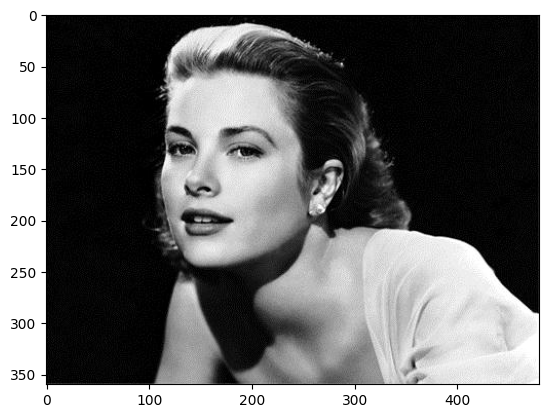

In [109]:
default_grace = inout.read_jpg(img_path + 'grace.jpg')
scale = 1.5
inout.show_jpg(default_grace)

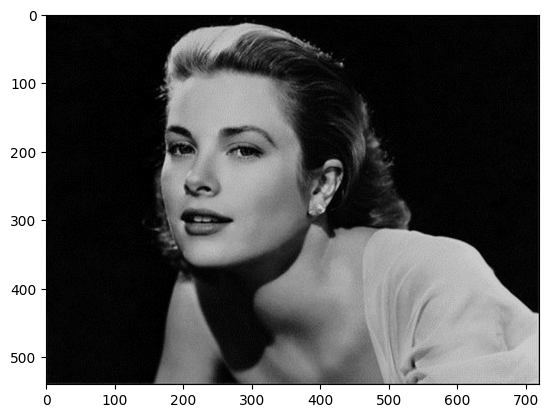

In [110]:
big_grace = upscale(default_grace, scale)
inout.show_jpg(big_grace)

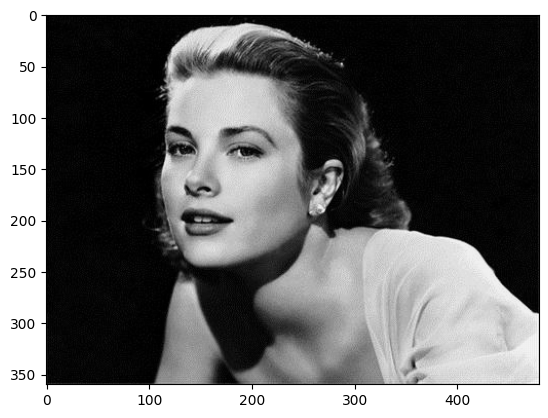

In [111]:
grace_reborn = downscale(big_grace, 1/scale)
inout.show_jpg(grace_reborn)

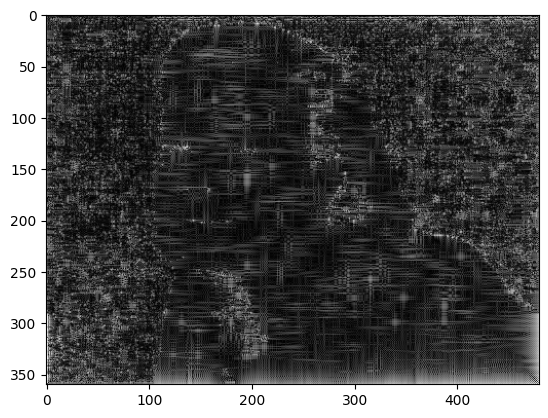

In [112]:
inout.show_jpg(np.log(1 + image_diff(grace_reborn, default_grace)))